

![Intro Image](Images/ai_cv_intro.png)
# **Visão Artificial** - Sistemas de Visão e Perceção
# <span style="background-image: linear-gradient(to right, #ff0080, #8000ff); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Tiago Padilha</span>


### **Computer Vision** é um domínio da **inteligência artificial** que permite a computadores **interpretar e tomar decisões** com base em **dados visuais**, mesmo em **ambientes dinâmicos**.  🚀

### Esta capacidade permite revolucionar as indústrias e melhorar a interação humana com a tecnologia. 🤖👨‍💻



## **4 - Processamento e Deteção**

- Após a utilização de técnicas de pré-processamento, passamos para uma fase de processamento de uma imagem com a utilização de operações morfológicas, filtros e técnicas de deteção de objetos.

---

#### Ler uma imagem 

Realiza a leitura simples de uma imagem.

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"Images\Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Image of Lenna', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Histograma

In [15]:
def histogram_gray(img_hist_gray):

  gray_hist = cv2.calcHist([img_hist_gray], [0], None, [256], [0,256])

  plt.figure()
  plt.title('Grayscale Histogram')
  plt.xlabel('Pixel Value')
  plt.ylabel('Qt. of pixels')
  plt.plot(gray_hist)
  plt.xlim([0,256])
  plt.show()
  

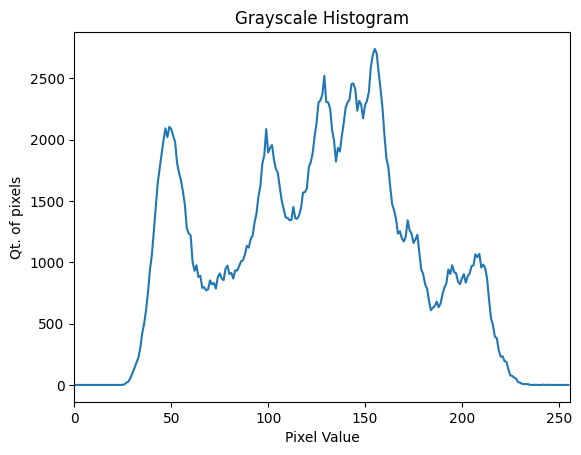

KeyboardInterrupt: 

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread(r"Images\Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Ler o histograma da imagem em escala de cinza
histogram_gray(gray_image)

cv2.imshow('Image of a Lenna Histogram', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Funções para visualização de 2 ou 3 imagens

In [3]:
import matplotlib.pyplot as plt
import cv2

def show_2figures(img1, img2, title1='', title2=''):
  # title must be = 'Some title'

  # Create a figure and axes
  _ , axes = plt.subplots(1, 2, figsize=(10, 5))

  # Display the images
  axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  axes[0].set_title(title1)
  axes[0].axis('off')

  axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  axes[1].set_title(title2)
  axes[1].axis('off')

  # Adjust the spacing between subplots
  plt.subplots_adjust(wspace=0.1)


def show_3figures(img1, img2, img3, title1='', title2='', title3=''):
  # title must be = 'Some title'

  # Create a figure and axes
  _ , axes = plt.subplots(1, 3, figsize=(16, 12))

  # Display the images
  axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  axes[0].set_title(title1)
  axes[0].axis('off')

  axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  axes[1].set_title(title2)
  axes[1].axis('off')

  axes[2].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
  axes[2].set_title(title3)
  axes[2].axis('off')

  # Adjust the spacing between subplots
  plt.subplots_adjust(wspace=0.1)

## **Deteção de Arestas**

#### Deteção de Arestas com operador de **Sobel**

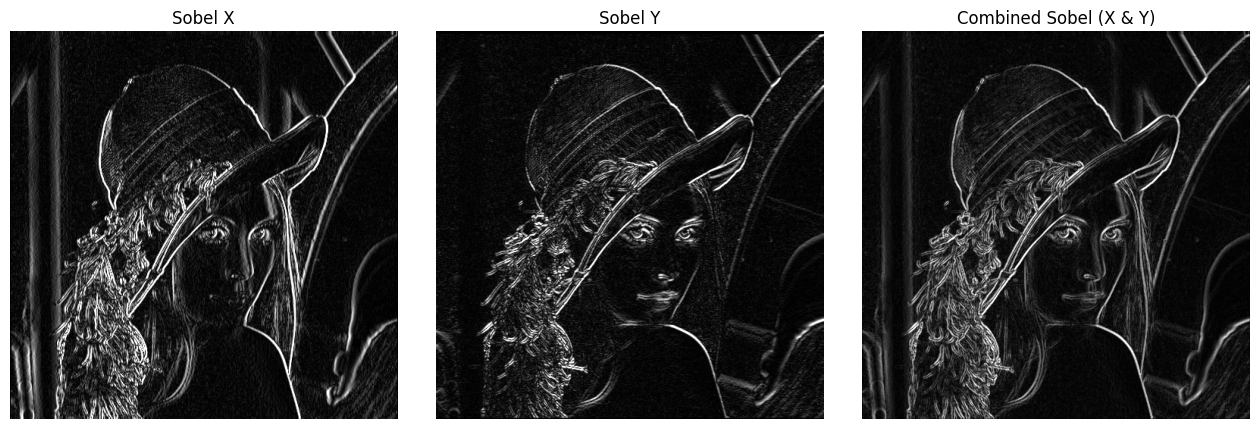

In [7]:
import cv2
import numpy as np

image = cv2.imread(r"Images\Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel Operator

# Aplicar deteção de extremos/arestas com operador Sobel
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Converter a saída em unit8
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combinar os dois operadores x e y
combined_sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

show_3figures(sobel_x, sobel_y, combined_sobel, 'Sobel X', 'Sobel Y', 'Combined Sobel (X & Y)')

#### Deteção de Arestas com operador de **Prewitt**

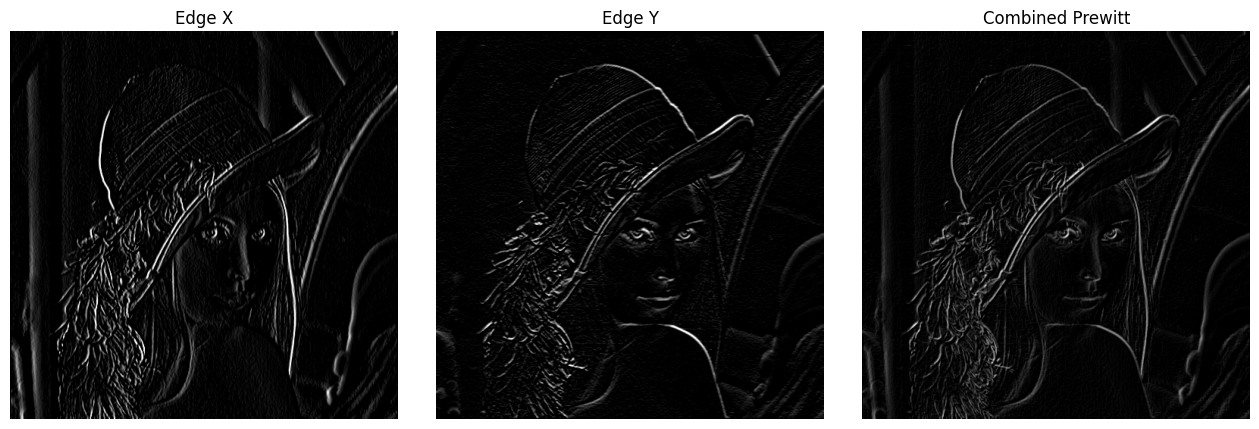

In [8]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"Images\Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Prewitt Operator
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]], dtype=np.float32)

prewitt_y = np.array([[-1, -1, -1],
                      [ 0, 0, 0],
                      [ 1, 1, 1]], dtype=np.float32)

edge_x = cv2.filter2D(gray_image, -1, prewitt_x)
edge_y = cv2.filter2D(gray_image, -1, prewitt_y)

combined_prewitt = cv2.addWeighted(edge_x, 0.5, edge_y, 0.5, 0)

show_3figures(edge_x, edge_y, combined_prewitt, 'Edge X', 'Edge Y', 'Combined Prewitt')

#### Deteção de Arestas com operador de **Canny**

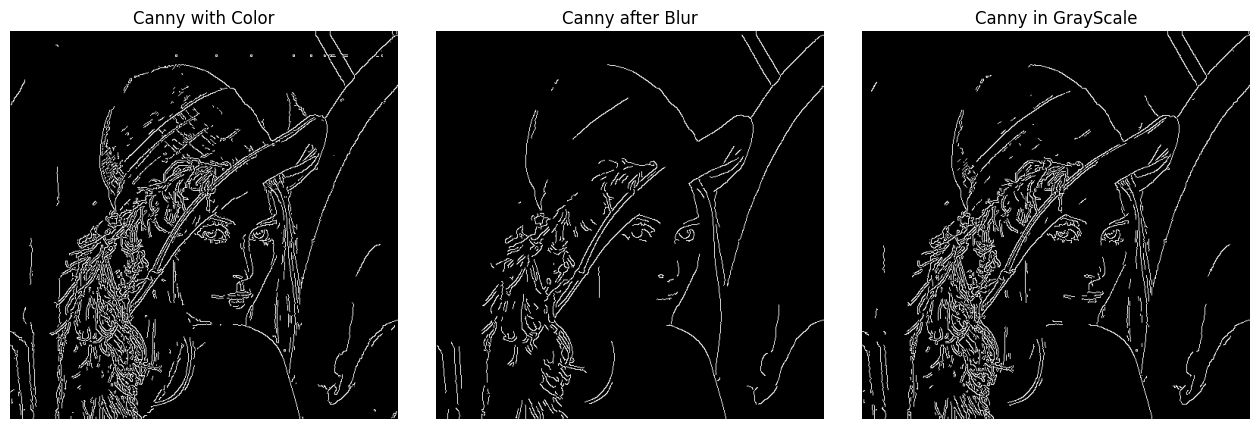

In [10]:
import cv2
import numpy as np

image = cv2.imread(r"Images\Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Operator

# Canny com imagem original
original_canny = cv2.Canny(image, 125, 175)


# Canny com imagem blur
blur = cv2.GaussianBlur(gray_image, (5,5), 0)
blur_canny = cv2.Canny(blur, 125, 175)

gray_canny = cv2.Canny(gray_image, 125, 175)

show_3figures(original_canny, blur_canny, gray_canny, 'Canny with Color', 'Canny after Blur', 'Canny in GrayScale')


## **Dilatação e Erosão**

- A dilatação é aplicada segundo o eixo x e y, no qual é possível adicionar n pixels aos pontos brancos da imagem.
- A erosão é aplicada segundo o eixo x e y, no qual é possível remover n pixels aos pontos brancos da imagem.

#### Dilatação de uma imagem

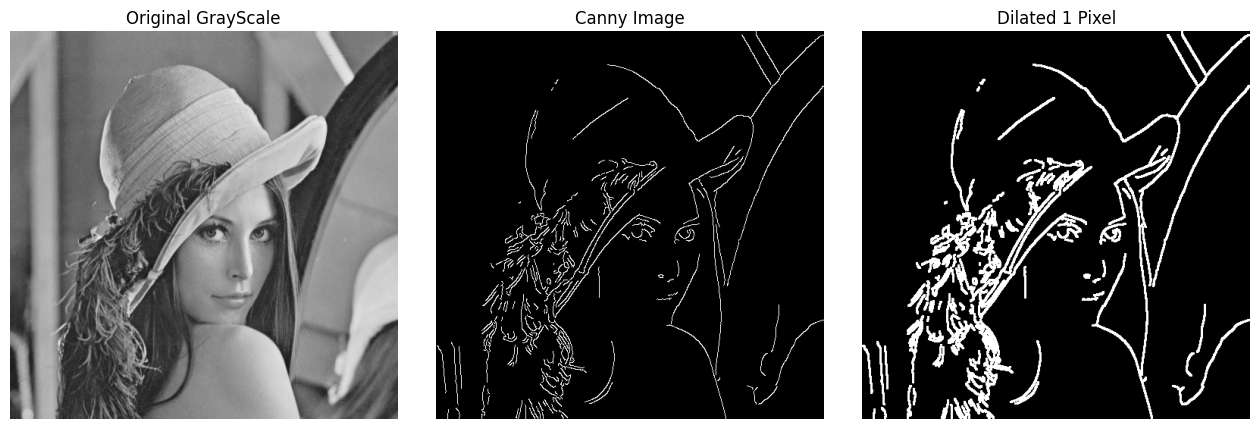

In [12]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"Images\Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Dilate Operator
# Canny com imagem blur
blur = cv2.GaussianBlur(gray_image, (5,5), 0)
blur_canny = cv2.Canny(blur, 125, 175)

kernel = np.ones((3,3), np.uint8)

dilated_1 = cv2.dilate(blur_canny, kernel, iterations=1)

show_3figures(gray_image, blur_canny, dilated_1, 'Original GrayScale', 'Canny Image', 'Dilated 1 Pixel')

#### Erosão de uma imagem

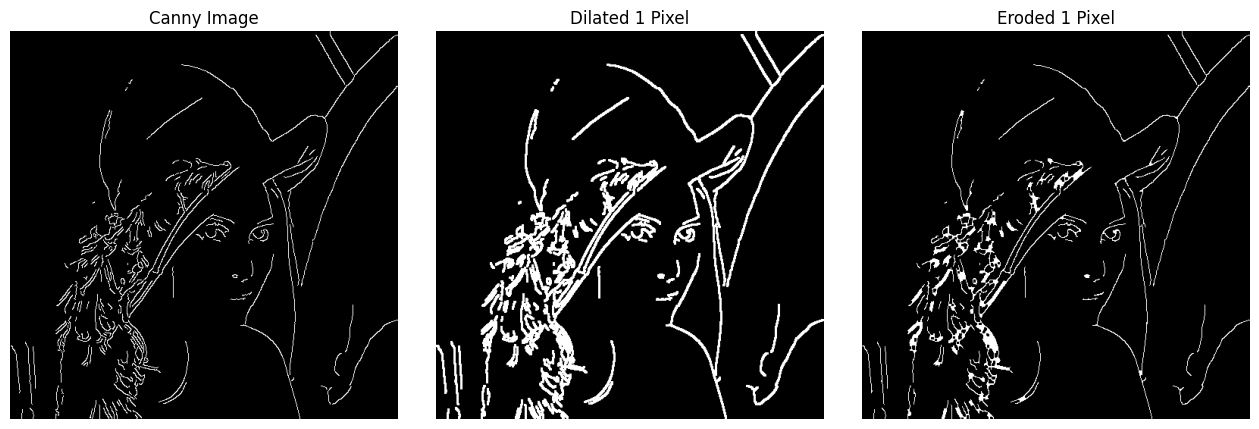

In [13]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"Images\Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Erode Operator
eroded_1 = cv2.erode(dilated_1, kernel, iterations=1)

show_3figures(blur_canny, dilated_1, eroded_1, 'Canny Image', 'Dilated 1 Pixel', 'Eroded 1 Pixel')

#### Skeletonization

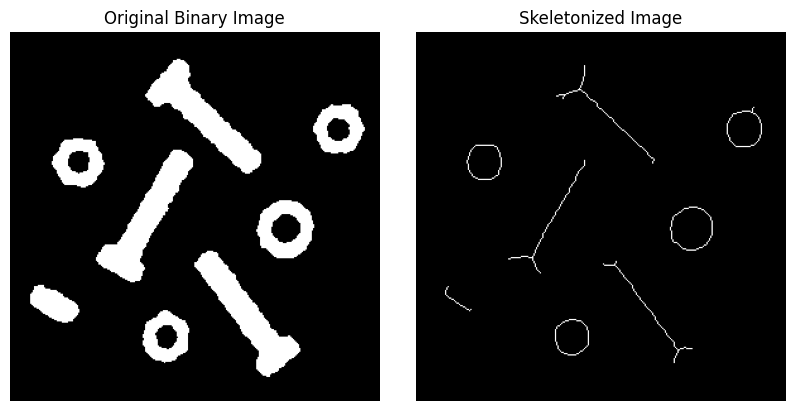

In [20]:
import cv2
import numpy as np
from skimage.morphology import skeletonize

# Load the image
image = cv2.imread(r"Images\porcas.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Skeletonize Operator
blur = cv2.GaussianBlur(gray_image, (5,5), 0)

_, binary_image = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)

binary_image = cv2.bitwise_not(binary_image)

skeleton = skeletonize(binary_image)


show_2figures(binary_image, skeleton.astype(np.uint8)*255, 'Original Binary Image', 'Skeletonized Image')

#### Detetar parafusos na imagem através de contornos e contar o número de parafusos

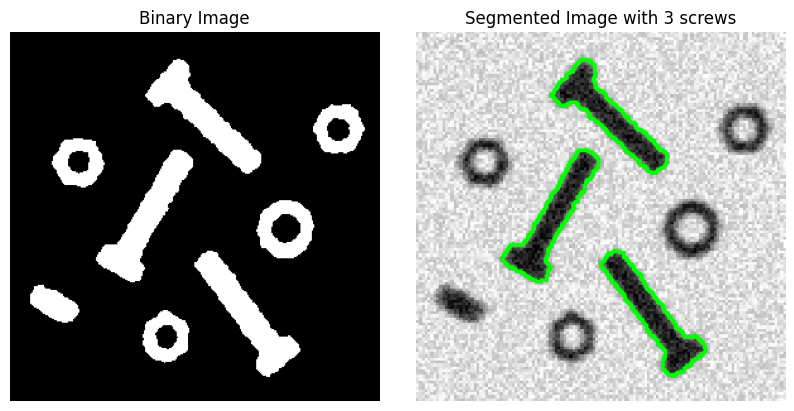

In [28]:
import cv2
import numpy as np
from skimage.morphology import skeletonize

# Load the image
image = cv2.imread(r"Images\porcas.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the edges of the screws
blur = cv2.GaussianBlur(gray_image, (5,5), 0)

_, binary_image = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)

binary_image = cv2.bitwise_not(binary_image)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_size_screw = 2000.00
final_image = image.copy()
count = 0

for cnt in contours:
    if cv2.contourArea(cnt) > min_size_screw:
        cv2.drawContours(final_image, [cnt], -1, (0, 255, 0), 2)
        count +=1

show_2figures(binary_image, final_image, 'Binary Image', f'Segmented Image with {count} screws')


#### Detetar porcas na imagem através de contornos e contar o número de porcas

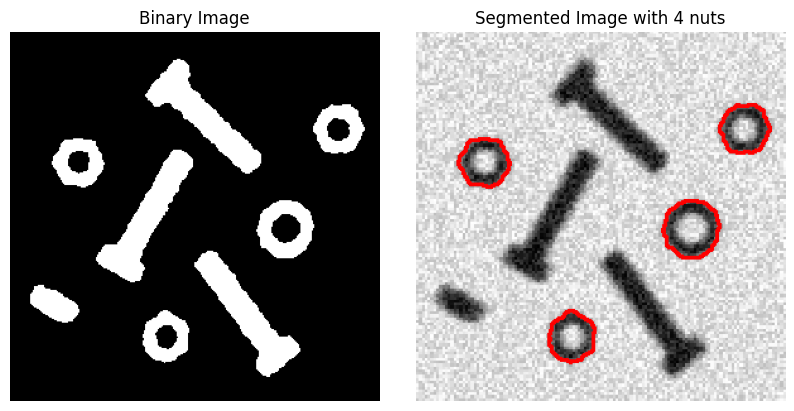

In [31]:
import cv2
import numpy as np
from skimage.morphology import skeletonize

# Load the image
image = cv2.imread(r"Images\porcas.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the edges of the nuts
blur = cv2.GaussianBlur(gray_image, (5,5), 0)

_, binary_image = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)

binary_image = cv2.bitwise_not(binary_image)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_size_nuts = 1000.0
max_size_nuts = 1990.0
final_image = image.copy()
count = 0

for cnt in contours:
    if cv2.contourArea(cnt) > min_size_nuts and cv2.contourArea(cnt) < max_size_nuts :
        cv2.drawContours(final_image, [cnt], -1, (0, 0, 255), 2)
        count +=1

show_2figures(binary_image, final_image, 'Binary Image', f'Segmented Image with {count} nuts')

#### Analisar descritores de diferentes objetos numa imagem

Blob 1:
 - Area: 1085.5
 - Perimeter: 129.63960886001587
 - Circularity: 0.8116415428326871
 - Convexity: 0.9530289727831431
 - Inertia Ratio: 101721.53601770848

Blob 2:
 - Area: 675.0
 - Perimeter: 110.56854128837585
 - Circularity: 0.6938258505394728
 - Convexity: 0.9433962264150944
 - Inertia Ratio: 30607.356995895505

Blob 3:
 - Area: 2355.0
 - Perimeter: 291.50461435317993
 - Circularity: 0.348265061804403
 - Convexity: 0.7473817835607743
 - Inertia Ratio: 1636761.501191318

Blob 4:
 - Area: 1552.0
 - Perimeter: 150.7106772661209
 - Circularity: 0.8586447877943293
 - Convexity: 0.9651741293532339
 - Inertia Ratio: 201555.0455326438

Blob 5:
 - Area: 2393.0
 - Perimeter: 298.5340509414673
 - Circularity: 0.33741533318196526
 - Convexity: 0.7366476835462521
 - Inertia Ratio: 1998951.1597599462

Blob 6:
 - Area: 1157.0
 - Perimeter: 132.2253954410553
 - Circularity: 0.8315980722955724
 - Convexity: 0.9550144449030128
 - Inertia Ratio: 105431.91613848321

Blob 7:
 - Area: 1152.5
 - P

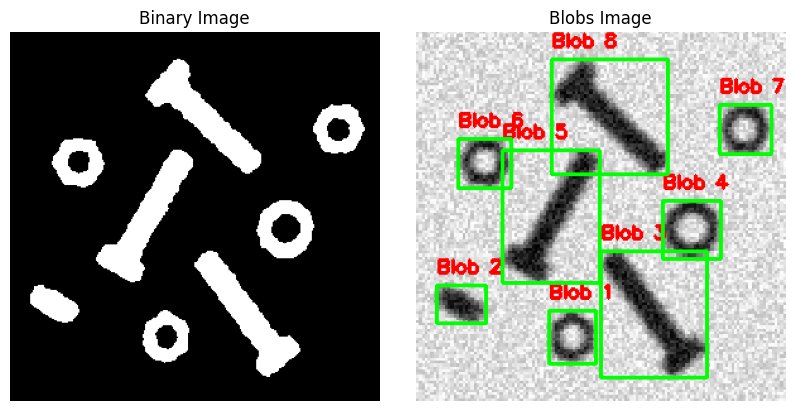

In [34]:
import cv2
import numpy as np
from skimage.morphology import skeletonize

# Load the image
image = cv2.imread(r"Images\porcas.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the edges of the nuts
blur = cv2.GaussianBlur(gray_image, (5,5), 0)

_, binary_image = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)

binary_image = cv2.bitwise_not(binary_image)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, contour in enumerate(contours):

    # Area
    area = cv2.contourArea(contour)

    # Perimeter
    perimeter = cv2.arcLength(contour, True)

    # Circularity
    circularity = (4* np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

    #Convex hull or Convexity
    hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(hull)
    convexity = area / hull_area if hull_area != 0 else 0

    #Inertia or Centroid
    moments = cv2.moments(contour)
    if moments['mu02'] + moments['mu20'] != 0:
        inertia_ratio = (moments['mu20']) / (moments['mu20']) + moments['mu02']
    else:
        inertia_ratio = 0

    # Draw Rectangles 
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x,y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, f"Blob {i + 1}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Print descriptors
    print(f"Blob {i + 1}:")
    print(f" - Area: {area}")
    print(f" - Perimeter: {perimeter}")
    print(f" - Circularity: {circularity}")
    print(f" - Convexity: {convexity}")
    print(f" - Inertia Ratio: {inertia_ratio}")
    print()

show_2figures(binary_image, image, 'Binary Image', 'Blobs Image')